<a href="https://colab.research.google.com/github/ingus-t/SPAI/blob/master/Notes/chest_xrays_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Dataset on Kaggle** https://www.kaggle.com/nih-chest-xrays/data  
**Research document for this dataset:** *ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases* https://arxiv.org/abs/1705.02315


For this notebook to work - upload (drag&drop) the file Data_Entry_2017.csv on the left side (in Colab)

**Class count for images with only 1 class:**
```
No Finding              60361
Infiltration            9547
Atelectasis             4215
Effusion                3955
Nodule                  2705
Pneumothorax            2194
Mass                    2139
Consolidation           1310
Pleural_Thickening      1126
Cardiomegaly            1093
Emphysema                892
Fibrosis                 727
Edema                    628
Pneumonia                322
Hernia                   110
```

**Total count for all classes**
```
No_Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
```

**Accuracy achieved by transfer learning, using Resnet50 model by paper authors**
```
Atelectasis     0.7069
Cardiomegaly    0.8141
Effusion        0.7362
Infiltration    0.6128
Mass            0.5609
Nodule          0.7164
Pneumonia       0.6333
Pneumothorax    0.7891
```



# Data exploration

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
from google.colab import files
from collections import Counter
import collections

import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/ingus-t/SPAI/master/resources/Data_Entry_2017.csv") 

In [3]:
df.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [4]:
df.shape

(112120, 12)

In [5]:
df.dtypes

Image Index                     object
Finding Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                      int64
Patient Gender                  object
View Position                   object
OriginalImage[Width              int64
Height]                          int64
OriginalImagePixelSpacing[x    float64
y]                             float64
Unnamed: 11                    float64
dtype: object

In [6]:
df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [7]:
# find count of Hernia or any other condition
df[df['Finding Labels'] == 'Hernia'].shape[0]

110

### Find all labels

In [0]:
all_classes = ['Cardiomegaly', 'No Finding', 'Hernia', 'Infiltration', 'Nodule',
           'Emphysema', 'Effusion', 'Atelectasis', 'Pleural_Thickening',
           'Pneumothorax', 'Mass', 'Fibrosis', 'Consolidation', 'Edema',
           'Pneumonia']

### Class distribution: single class images vs multi-class images

In [0]:
# name, occurences as the only class, total occurences (including multi-class images)
distribution=[
  ["No Finding",        60361,60361],
  ["Infiltration",      9547, 19894],
  ["Atelectasis",       4215, 11559],
  ["Effusion",          3955, 13317],
  ["Nodule",            2705, 6331],
  ["Pneumothorax",      2194, 5302],
  ["Mass",              2139, 5782],
  ["Consolidation",     1310, 4667],
  ["Pleural_Thickening",1126, 3385],
  ["Cardiomegaly",      1093, 2776],
  ["Emphysema",         892,  2516],
  ["Fibrosis",          727,  1686],
  ["Edema",             628,  2303],
  ["Pneumonia",         322,  1431],
  ["Hernia",            110,  227],
]

# put data in arrays so I can use them for x, y in matplotlib
conditions, occurence_single, occurence_total, ratio = [], [] , [], []
for i in range(0, len(distribution)):
  conditions.append(distribution[i][0])
  occurence_single.append(distribution[i][1])
  occurence_total.append(distribution[i][2])
  ratio.append(distribution[i][2] / distribution[i][1])

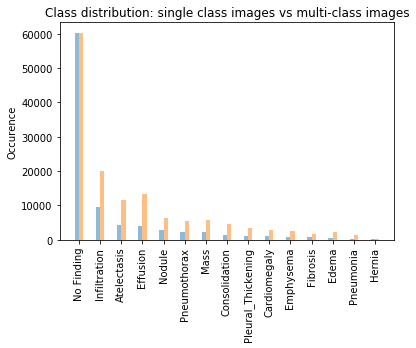

In [10]:
x_labels = np.arange(len(conditions))

indices = range(len(conditions))
width = np.min(np.diff(indices))/5.

plt.bar(indices-width/2., occurence_single, width, align='center', alpha=0.5)
plt.bar(indices+width/2., occurence_total,  width, align='center', alpha=0.5)
# Third column, not needed
#plt.bar(indices+width/0.65, occurence_total, width, align='center', alpha=0.5)

plt.xticks(x_labels, conditions, rotation='vertical')
plt.ylabel('Occurence')
plt.title('Class distribution: single class images vs multi-class images')

plt.show()

### Actual class distribution for all 15 classes

In [11]:
# Find class distribution for all 15 classes: 
df['Finding Labels'] = df['Finding Labels'].str.replace('|',' ')
df['Finding Labels'].str.split(expand=True).stack().value_counts()

Finding               60361
No                    60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
dtype: int64

### Anomalies

In [12]:
# There are people with age 148 and higher, display these anomalies
df['Patient Age'].sort_values(ascending=False).head(30)

46965     414
86264     413
91369     412
20852     412
85404     412
84810     411
104590    155
101194    155
98495     154
95794     153
74884     152
78795     151
58650     150
62929     149
55742     148
48284     148
58464      95
578        94
74736      94
74735      94
74733      94
74734      94
74737      94
577        94
576        94
74732      93
74729      93
5358       93
3761       93
108422     93
Name: Patient Age, dtype: int64

In [13]:
#get mean age
df['Patient Age'].mean()

46.90146271851587

In [0]:
# replace values that are too large with the mean
df['Patient Age'] = np.where(df['Patient Age'] > 95, 47, df['Patient Age'])

### X-ray view position

In [15]:
count = Counter(df['View Position'])
count

Counter({'AP': 44810, 'PA': 67310})

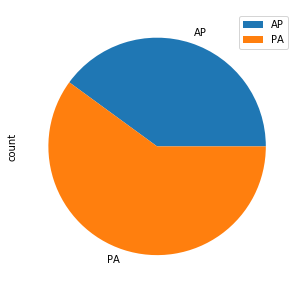

In [16]:
pie = pd.DataFrame({'count': [count['AP'], count['PA']]}, index=['AP', 'PA'])
pie.plot.pie(y='count', figsize=(5, 5))

### AP/PA distribution for every condition

746 347 Cardiomegaly
39302 21059 No Finding
98 12 Hernia
5270 4277 Infiltration
1924 781 Nodule
525 367 Emphysema
2086 1869 Effusion
2210 2005 Atelectasis
875 251 Pleural_Thickening
1506 688 Pneumothorax
1367 772 Mass
648 79 Fibrosis
346 964 Consolidation
51 577 Edema
176 146 Pneumonia


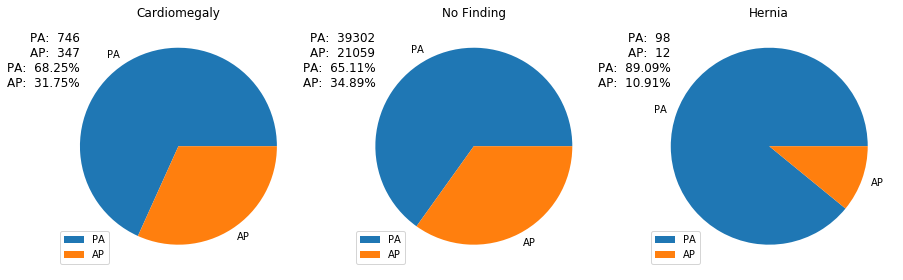

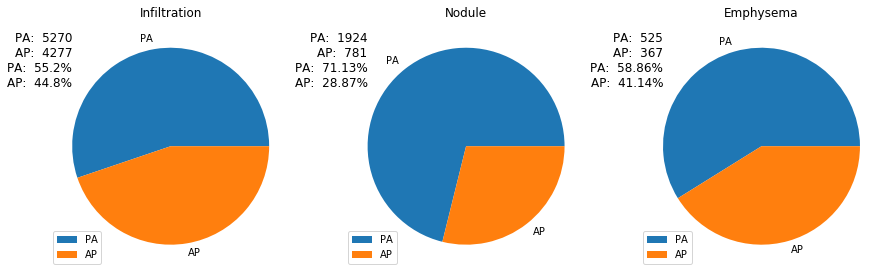

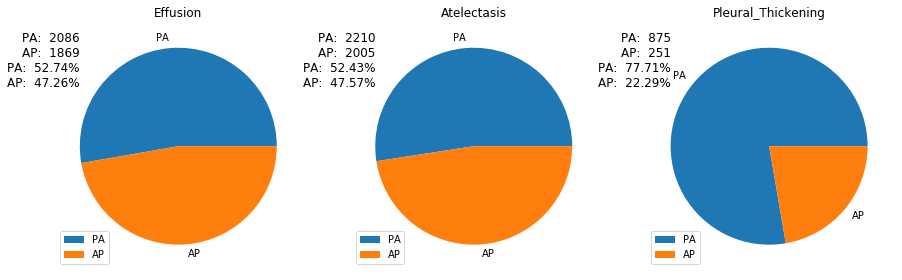

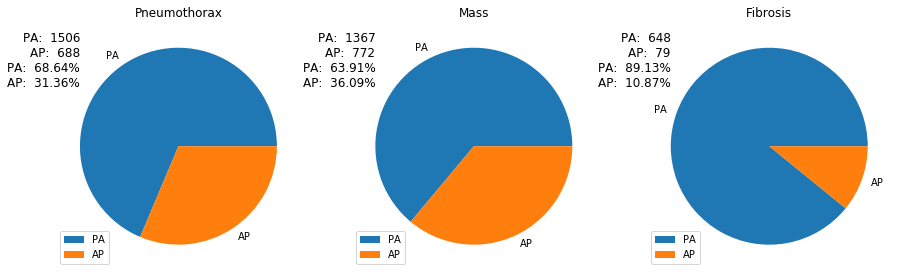

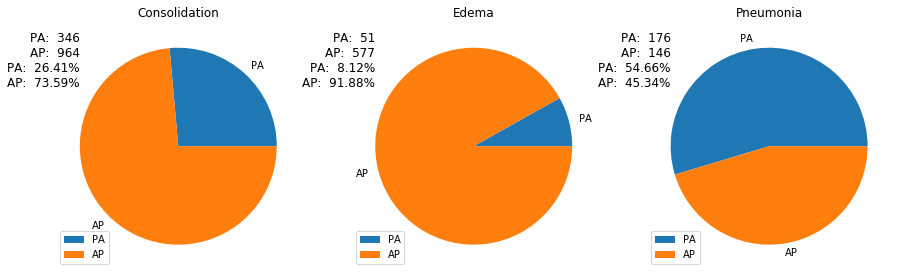

In [57]:
xray_orientation = ["PA","AP"]
def draw_multiplot(g, num_columns, figsize_for_one_row=None):
    # call 'next(g)' to get past the first 'yield'
    next(g)
    # default to 15-inch rows, with square subplots
    if figsize_for_one_row is None:
        figsize_for_one_row = (15, 15/num_columns)
    try:
        while True:
            # call plt.figure once per row
            plt.figure(figsize=figsize_for_one_row)
            for col in range(num_columns):
                ax = plt.subplot(1, num_columns, col+1)
                next(g)
    except StopIteration:
        pass

def draw_plot():
    for condition in all_classes:
        df_test = df[df['Finding Labels'] == condition]
        pa = len(df_test[df_test["View Position"] == 'PA'])
        ap = len(df_test[df_test["View Position"] == 'AP'])

        print(pa,ap,condition)
        y_axis = [pa,ap]
        total = pa+ap
        pa_percentage = str(round(pa/total * 100,2))
        ap_percentage = str(round(ap/total * 100,2))

        yield
        plt_string = "PA:  " + str(pa) + "\nAP:  " + str(ap) + "\nPA:  " + pa_percentage + "%\nAP:  " + ap_percentage + "%"
        plt.pie(y_axis, labels=xray_orientation)
        plt.title(condition)
        plt.legend(loc='lower left')
        plt.text(-1, 0.6, plt_string, color='black', ha='right', va='baseline', size=12)

draw_multiplot(draw_plot(), 3)

### Gender

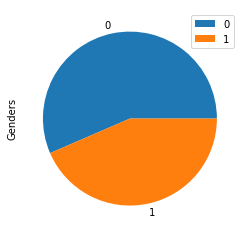

In [55]:
a = dict(Counter(df['Patient Gender']))

#draw the graph
temp_df = pd.DataFrame({'gender': list(a.keys()), 'Genders': list(a.values())})
ax = temp_df.plot.pie(x='gender', y='Genders', rot=0)

### Age distribution

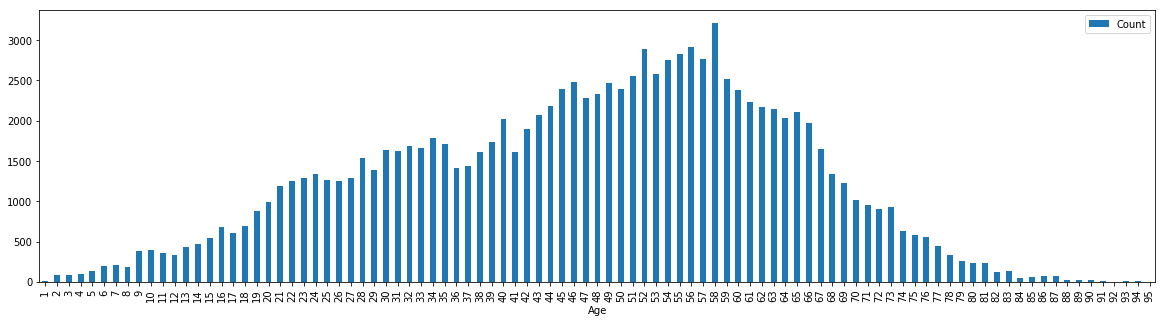

In [19]:
unordered_dict = dict(Counter(df['Patient Age']))
# make an ordered list, so the graph makes more sense
ordered_list = collections.OrderedDict(sorted(unordered_dict.items()))

#draw the graph
temp_df = pd.DataFrame({'Age': list(ordered_list.keys()), 'Count': list(ordered_list.values())})
ax = temp_df.plot.bar(x='Age', y='Count', figsize=(20,5))

In [20]:
ordered_list.keys()

odict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [0]:
# male + age

In [0]:
# female + age

### Medical condition label distribution
Not exactly what we need, it considers 'Hernia|Infiltration|Nodule' as 1 class, but it is actually 3.  
This gives us a total of 836 different class combinations.

In [23]:
df['Finding Labels'].value_counts()

No Finding                                                                                              60361
Infiltration                                                                                             9547
Atelectasis                                                                                              4215
Effusion                                                                                                 3955
Nodule                                                                                                   2705
Pneumothorax                                                                                             2194
Mass                                                                                                     2139
Effusion Infiltration                                                                                    1603
Atelectasis Infiltration                                                                                 1350
Consolidat

### Condition occurence
How likely the condition is to appear as the only condition, or together with others  
1 means it only appears by itself, as the only class  
Larger value indicates the class is more likely to appear in multi-class images.
Pneumonia is the most likely to appear in multi-class images, while Infiltration is the least likely.

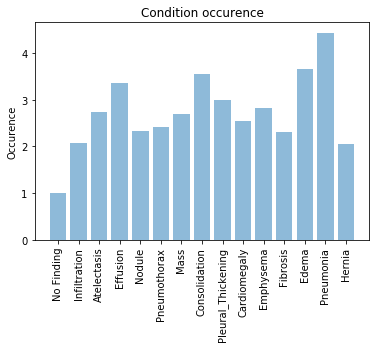

In [24]:
x_labels = np.arange(len(conditions))
plt.bar(conditions, ratio, align='center', alpha=0.5)
plt.xticks(x_labels, conditions, rotation='vertical')
plt.ylabel('Occurence')
plt.title('Condition occurence')
plt.show()

In [25]:
df['Patient Age'].sort_values(ascending=False).head(20)

58464     95
74737     94
74736     94
576       94
74735     94
74734     94
577       94
578       94
74733     94
74732     93
3762      93
39016     93
74731     93
74730     93
74729     93
108422    93
3761      93
5358      93
584       92
231       92
Name: Patient Age, dtype: int64

### Check images from each class

In [0]:
import PIL
from PIL import Image
import numpy as np

In [0]:
#image = Image.open('00000001_000.png')
#np.array(image).shape
#image
#a = np.array(image)
#type(image)

# Sampling function
We decide which classes to use

### Create new folder for each chosen class

In [0]:
chosen_classes = ['Cardiomegaly', 'No Finding', 'Emphysema', 'Effusion', 'Atelectasis', 'Pleural_Thickening', 'Nodule','Edema']
for i in range(0, len(chosen_classes)):
  pass
  #os.makedirs("./1024x1024/train/" + str(chosen_classes[i]))
  #os.makedirs("./1024x1024/test/"  + str(chosen_classes[i]))
  #os.makedirs("./1024x1024/valid/" + str(chosen_classes[i]))          # <---- enable to create folders

### Sampling function

In [0]:
# take only the 2 columns we need
df1 = df[['Image Index','Finding Labels','View Position']]

# sample n random images from a specific class, resize them, and copy to train/test/valid folders
def sample_images(df1, class_name, count):
  if class_name == 'Cardiomegaly':
    df_test = df1[df1['Finding Labels'] == 'Cardiomegaly']
  else:
    df_test = df1[df1['Finding Labels'] == class_name]
    df_test = df_test[df_test["View Position"] == "PA"]

  df_test = df_test.sample(n = count)
  df_test = df_test[['Image Index']]

  image_names = df_test.values

  for i in range(0, count):
    if i < 100:
      folder = "valid/" + class_name + "/"
    elif i < 200:
      folder = "test/"  + class_name + "/"
    else:
      folder = "train/" + class_name + "/"
    
	# clean up image names
    image_name = str(image_names[i])
    image_name = image_name.replace("[", "")
    image_name = image_name.replace("]", "")
    image_name = image_name.replace("'", "")
	
	# progress message, so we know something is happening
    if i % 400 == 0:
      print(i,"We are copying images from:", class_name)
    	
	# copy images to the folder	
    copy_from = "./1024x1024/" + image_name
    copy_to   = "./zipthis/" + folder + image_name
    #print(copy_from, copy_to)
    #shutil.copy(os.path.join(copy_from), os.path.join(copy_to))   # <---- enable to copy images into folders
  print("---")

### Prepare the sampled images

In [30]:
for j in range(0, len(chosen_classes)):
  print(j+1, "/", len(chosen_classes),", sampling:", chosen_classes[j])
  count = 0
  if chosen_classes[j] == 'Cardiomegaly':
    count = 1093
  else:
    count = 1500
  pass
  #sample_images(df1, chosen_classes[j], count)

1 / 8 , sampling: Cardiomegaly
2 / 8 , sampling: No Finding
3 / 8 , sampling: Emphysema
4 / 8 , sampling: Effusion
5 / 8 , sampling: Atelectasis
6 / 8 , sampling: Pleural_Thickening
7 / 8 , sampling: Nodule
8 / 8 , sampling: Edema


###Download labels/image names as csv

In [0]:
df1.to_csv('labels.csv') 
files.download('labels.csv')

# Script to download all 45 GB of images
- **no longer needed**. Download from Kaggle if you want the dataset locally  
- Original function was for Python 2. In Python 3 **urlretrieve** method is moved to **request** module.  
- **Run this on your PC**, not on Colab :)

In [0]:
# Download the 56 zip files in Images_png in batches
import urllib.request

def download_all_images():
  # URLs for the zip files
  links = [
      'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
      'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
      'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
      'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
      'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
      'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
      'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
      'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
      'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
      'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
      'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
      'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
  ]

  for idx, link in enumerate(links):
      fn = 'images_%02d.tar.gz' % (idx+1)
      print ('downloading', fn, '...')
      urllib.request.urlretrieve(link, fn)  # download the zip file
  print ("Download complete. Please check the checksums")